In [1]:
import rastereasy

# Reduction of Dimension

## 1) Read the image

In [3]:
name_im='./data/demo/sentinel.tif'
names = {"NIR":8,"G":3,"CO" : 1,"SWIR2":11,"B": 2,"R":4,"RE1":5,"RE2":6,"RE3":7,"WA":9,"SWIR1":10,"SWIR3":12}
image=rastereasy.Geoimage(name_im,names=names)
image.info()

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'CO': 1, 'B': 2, 'G': 3, 'R': 4, 'RE1': 5, 'RE2': 6, 'RE3': 7, 'NIR': 8, 'WA': 9, 'SWIR1': 10, 'SWIR2': 11, 'SWIR3': 12}




## 2) PCA

In [4]:
help(image.pca)


Help on method pca in module rastereasy.rastereasy:

pca(n_components=4, bands=None, random_state=None, dest_name=None, standardization=True, nb_points=1000) method of rastereasy.rastereasy.Geoimage instance
    Perform PCA on the image data.
    
    This method computes a Principal Component Analysis (PCA) on selected image bands.
    
    Parameters
    ----------
    n_components : int, optional
        Number of components to keep (if None, all components are kept).
        Default is 4.
    bands : list of str or None, optional
        List of bands to use. If None, all bands are used.
        Default is None.
    random_state : int or None, optional
        Random seed for reproducible results. If None, results may vary between runs.
        Default is RANDOM_STATE (defined globally).
    dest_name : str, optional
        Path to save the decomposition. If None, the image is not saved.
        Default is None.
    standardization : bool, optional
        Whether to standardize b

### 2.1) PCA on the entire image

In [5]:
pca, pca_model = image.pca(n_components=3, nb_points=None)

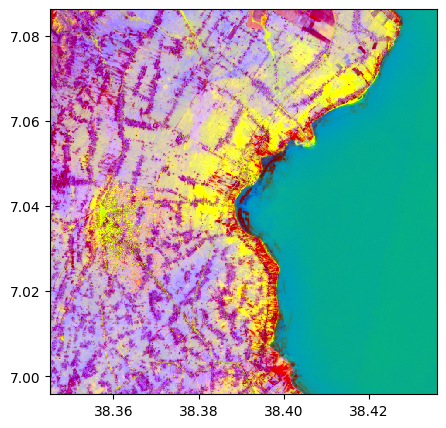

In [6]:
pca.colorcomp()

In [7]:
pca.info()

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 3
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'PCA_1': 1, 'PCA_2': 2, 'PCA_3': 3}




### 2.2) Applying the model to another image

In [8]:
image2=rastereasy.Geoimage('/Users/corpetti/Enseignement/2025-2026/TP_moustiques/im.tif', history=True)

In [9]:
help(image2.transform)

Help on method transform in module rastereasy.rastereasy:

transform(model, bands=None) method of rastereasy.rastereasy.Geoimage instance
    Apply a projection model  (PCA, tSNE, ...) to the image.
    
    This method applies a projection model (such as one created by pca())
    to the image data, creating a new   image.
    
    Parameters
    ----------
    model : scikit model or tuple
        If tuple, it must containi (data_model, scaler) where:
        - data_model: A trained scikit-learn model with a transform() method
        - scaler: The scaler used for standardization (or None if not used)
    bands : list of str or None, optional
        List of bands to use as input for the model. If None, all bands are used.
        Default is None.
    
    Returns
    -------
    Geoimage
        A new Geoimage containing the model output
    
    Examples
    --------
    >>> # Train a model on one image and apply to another
    >>> pca, model = reference_image.pca(n_components=5)
  

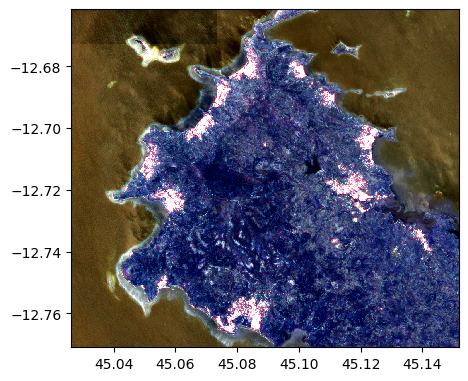

In [10]:
image2.colorcomp()

In [11]:
im_test_pca = image2.transform(pca_model)


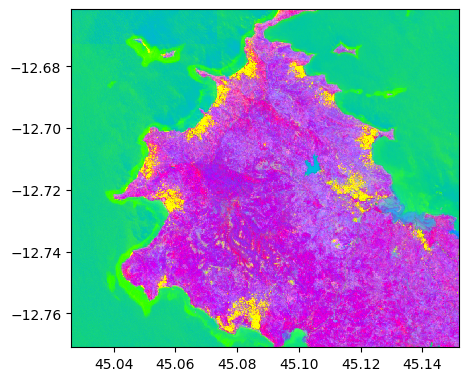

In [12]:
im_test_pca.colorcomp()

In [13]:
im_test_pca.info()

- Size of the image:
   - Rows (height): 1211
   - Cols (width): 1362
   - Bands: 3
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (-12.71625261, 45.08894774)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32738
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3}

--- History of modifications---
[2025-10-17 18:20:47] - Created image from data array
[2025-10-17 18:20:47] - Created using transformation model: PCA




### 2.3) PCA on a reduced number of points

In [14]:
pca, pca_model = image.pca(n_components=3, nb_points=2000)

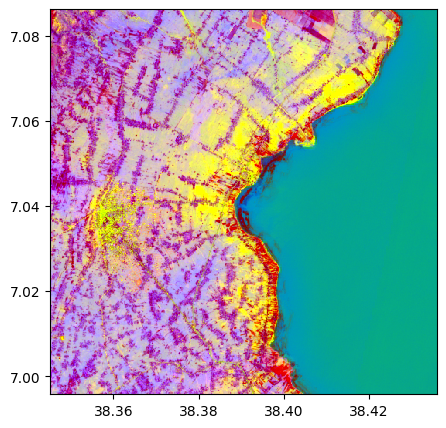

In [15]:
pca.colorcomp()

In [16]:
# Without standardization
pca, pca_model = image.pca(n_components=3, nb_points=2000, standardization=False)

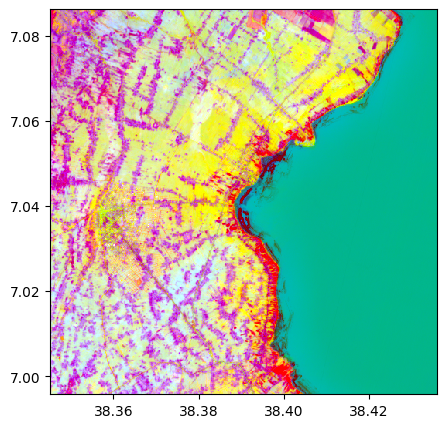

In [17]:
pca.colorcomp()

### 2.4) PCA on a reduced number of points and on selected bands

In [18]:
# Only on some bands
pca, pca_model = image.pca(n_components=3, nb_points=2000, standardization=False, bands=['R','G','B','NIR'])


In [19]:
pca_model[0].explained_variance_

array([1825541.84421836,  119753.9847745 ,    5060.20385938])

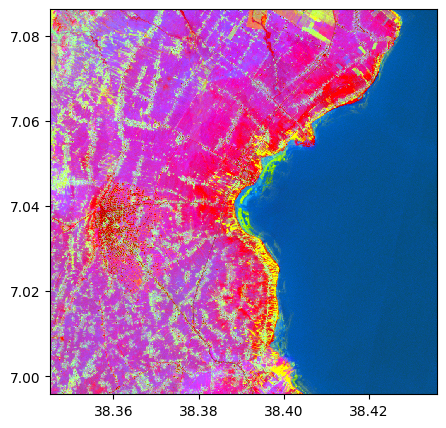

In [20]:
pca.colorcomp()

## 3) LLE

In [21]:
help(image.lle)


Help on method lle in module rastereasy.rastereasy:

lle(n_components=2, n_neighbors=8, bands=None, nb_points=5000, standardization=True, dest_name=None, random_state=None, **kwargs) method of rastereasy.rastereasy.Geoimage instance
    Perform Locally Linear Embedding (LLE) on the image data.
    
    This method computes a Locally Linear Embedding reduction to unfold the
    manifold on which the pixel values lie. It's particularly useful for
    data with an intrinsic low-dimensional structure that is non-linear.
    
    Parameters
    ----------
    n_components : int, optional
        The number of coordinates for the manifold (target dimension).
        Default is 2.
    n_neighbors : int, optional
        Number of neighbors to consider for each point. This is a crucial
        parameter for LLE that significantly impacts the result.
        Default is 8.
    bands : list of str or None, optional
        List of bands to use for the computation. If None, all bands are used.
   

### 3.1) LLE on the entire image

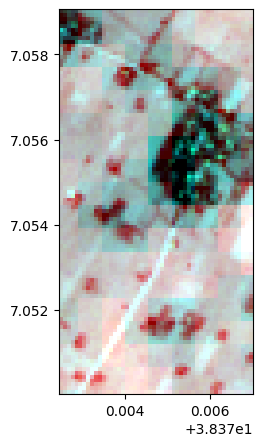

In [22]:
# Read only a subset of the image since TSNE can be long
image=rastereasy.Geoimage(name_im,names=names, area=((300,400),(300,350)), history=True)
image.colorcomp()
lle, lle_model = image.lle(n_components=3, n_neighbors= 12, nb_points=None)

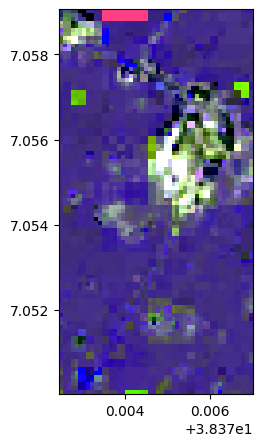

In [23]:
lle.colorcomp()

In [24]:
lle.info()

- Size of the image:
   - Rows (height): 100
   - Cols (width): 50
   - Bands: 3
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.05454580, 38.37472999)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'LLE_1': 1, 'LLE_2': 2, 'LLE_3': 3}

--- History of modifications---
[2025-10-17 18:21:46] - Created image from data array
[2025-10-17 18:21:46] - Created using transformation model: LocallyLinearEmbedding
[2025-10-17 18:21:46] - Changed band names
[2025-10-17 18:21:46] - Created using LLE with 3 components




### 3.2) Applying the model to another image

In [25]:
image2=rastereasy.Geoimage('/Users/corpetti/Enseignement/2025-2026/TP_moustiques/im.tif', history=True)

In [26]:
help(image2.transform)

Help on method transform in module rastereasy.rastereasy:

transform(model, bands=None) method of rastereasy.rastereasy.Geoimage instance
    Apply a projection model  (PCA, tSNE, ...) to the image.
    
    This method applies a projection model (such as one created by pca())
    to the image data, creating a new   image.
    
    Parameters
    ----------
    model : scikit model or tuple
        If tuple, it must containi (data_model, scaler) where:
        - data_model: A trained scikit-learn model with a transform() method
        - scaler: The scaler used for standardization (or None if not used)
    bands : list of str or None, optional
        List of bands to use as input for the model. If None, all bands are used.
        Default is None.
    
    Returns
    -------
    Geoimage
        A new Geoimage containing the model output
    
    Examples
    --------
    >>> # Train a model on one image and apply to another
    >>> pca, model = reference_image.pca(n_components=5)
  

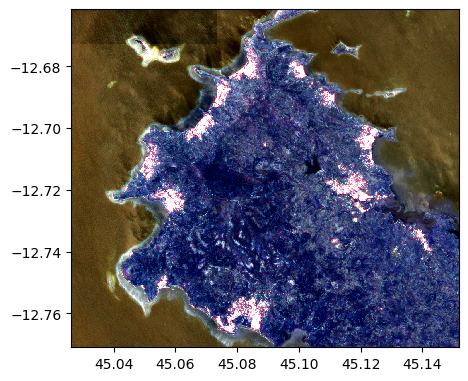

In [27]:
image2.colorcomp()

In [28]:
im_test_lle = image2.transform(lle_model)


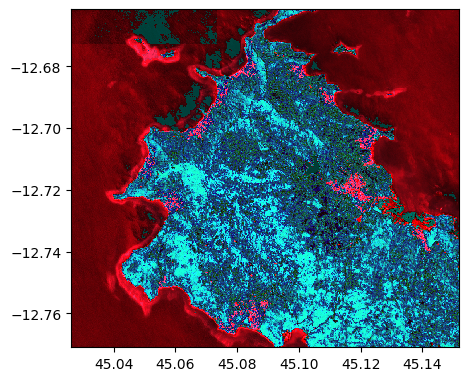

In [29]:
im_test_lle.colorcomp()

In [29]:
im_test_lle.info()

- Size of the image:
   - Rows (height): 1211
   - Cols (width): 1362
   - Bands: 3
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (-12.71625261, 45.08894774)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32738
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3}

--- History of modifications---
[2025-10-17 14:00:27] - Created image from data array
[2025-10-17 14:00:27] - Created using transformation model: LocallyLinearEmbedding




### 3.3) LLE on some points

In [30]:
lle, lle_model = image.lle(n_components=3, nb_points=8000)

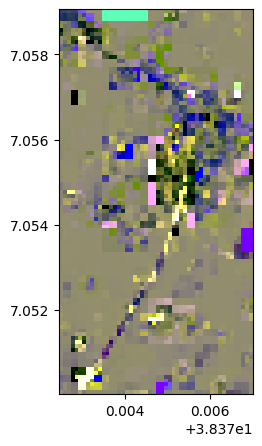

In [31]:
lle.colorcomp()

In [32]:
# Without standardization
lle, lle_model = image.lle(n_components=3, nb_points=2000, standardization=False)

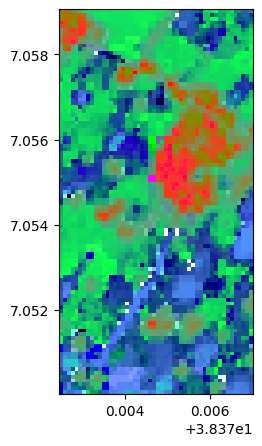

In [33]:
lle.colorcomp()

### 3.4) LLE on some points and on some selected bands

In [34]:
# Only on some bands
lle, lle_model = image.lle(n_components=3, nb_points=2000, standardization=False, bands=['R','G','B','NIR'])


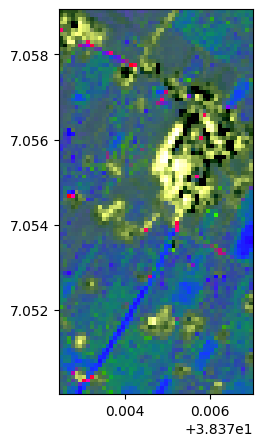

In [35]:
lle.colorcomp()

## 4) TSNE

In [36]:
help(image.tsne)


Help on method tsne in module rastereasy.rastereasy:

tsne(n_components=4, perplexity=5, bands=None, random_state=None, dest_name=None, standardization=True) method of rastereasy.rastereasy.Geoimage instance
    Perform TSNE on the image data.
    
    This method computes a t-distributed Stochastic Neighbor Embeddings (tSNE) on selected image bands.
    
    Parameters
    ----------
    n_components : int, optional
        Number of components to keep (if None, all components are kept).
        Default is 4.
    perplexity : int, optional
        Perplexity in TSNE. It is related to the number of nearest neighbors
           that is used in other manifold learning algorithms.
        Default is 4.
    bands : list of str or None, optional
        List of bands to use. If None, all bands are used.
        Default is None.
    random_state : int or None, optional
        Random seed for reproducible results. If None, results may vary between runs.
        Default is RANDOM_STATE (defin

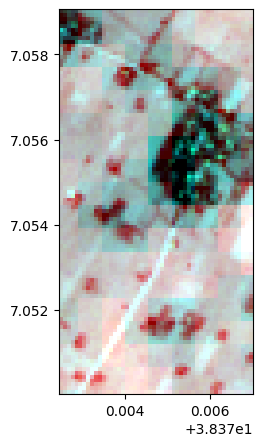

In [37]:
# Read only a subset of the image since TSNE can be long
image=rastereasy.Geoimage(name_im,names=names, area=((300,400),(300,350)), history=True)
image.colorcomp()

tsnei = image.tsne(n_components=3,  perplexity=10, bands=['R','G','RE2','SWIR1','NIR'])

In [38]:
tsnei.info()

- Size of the image:
   - Rows (height): 100
   - Cols (width): 50
   - Bands: 3
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.05454580, 38.37472999)
- Driver: GTiff
- Data type: float32
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'TSNE_1': 1, 'TSNE_2': 2, 'TSNE_3': 3}

--- History of modifications---
[2025-10-17 14:00:43] - Created image from data array
[2025-10-17 14:00:43] - Changed band names
[2025-10-17 14:00:43] - Created using TSNE with 3 components
	 Using bands: ['R', 'G', 'RE2', 'SWIR1', 'NIR']




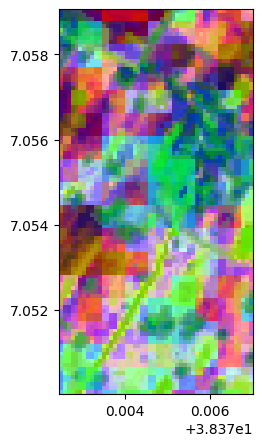

In [39]:
tsnei.colorcomp()